In [1]:
import pandas as pd
import numpy as np
#import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [14]:
df['Age'].skew()

-0.19593302867569365

In [15]:
#Outliers checking for Age Variable

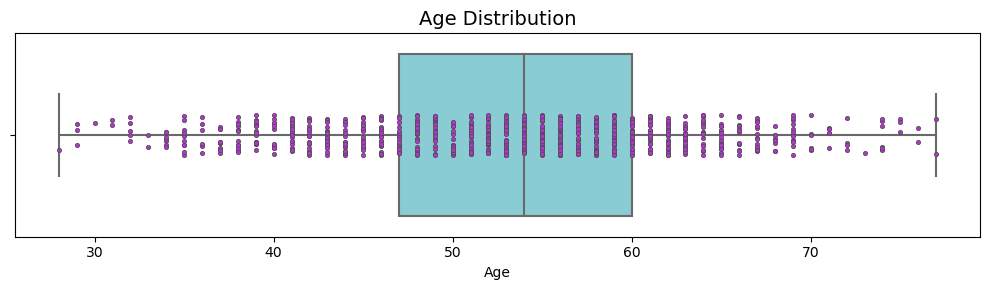

In [16]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(data=df, x='Age', color='#7ed6df')
sns.stripplot(data=df, x='Age', linewidth = 0.6, size=3, color='#be2edd')
plt.title('Age Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

In [17]:
#No outliers

In [18]:
##Analysis on Cholesterol Variable

In [19]:
df['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [21]:
df['Cholesterol'].skew()

-0.6100864307268192

In [22]:
#-ve is telling that the data is mostly to the left side!!
#which tells more values of cholestrol is less

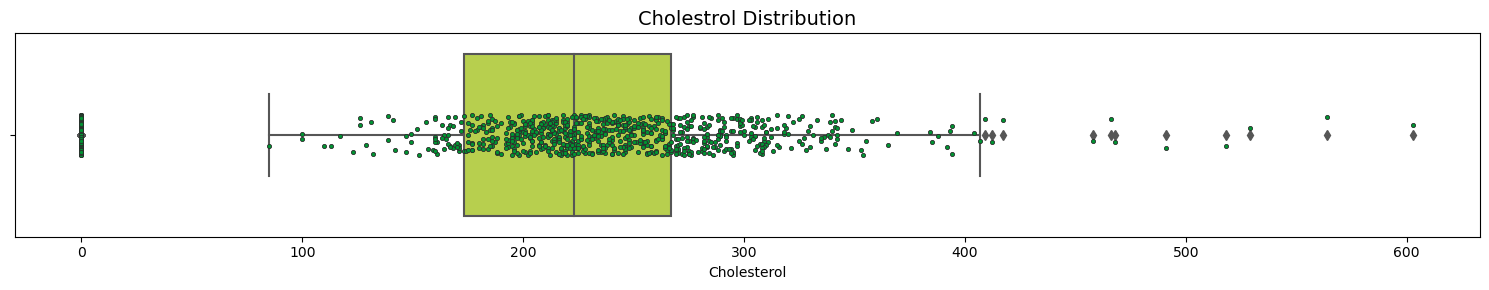

In [23]:
##Check for outliers for Cholestrol Variable

fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='Cholesterol', color='#C4E538')
sns.stripplot(data=df, x='Cholesterol', linewidth = 0.6, size=3, color='#009432')
plt.title('Cholestrol Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

In [24]:
#Outliers are obsereved in this varaible now removeing the variable outliers o teh data can be preprocessed into the models that i am gonna use further onn

In [25]:
##Outlier Detection Process below --> 

df[(df['Cholesterol'] == 0) & df['HeartDisease'] == 1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
508,67,M,ASY,120,0,1,Normal,150,N,1.5,Down,1
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [26]:
mean = np.mean(df['Cholesterol'])
std = np.std(df['Cholesterol'])
print('mean of the dataset is', mean)
print('std. deviation is', std)
print("Minimum value of Cholesterol",df['Cholesterol'].min())
print("Maximum value of Cholesterol",df['Cholesterol'].max())

mean of the dataset is 198.7995642701525
std. deviation is 109.32455089779246
Minimum value of Cholesterol 0
Maximum value of Cholesterol 603


In [27]:
#Cholesterol Cannot e zero but it can be greater thann 500 & 600 so the zero value must be an error done when the data is input or the readings might no be taken 

In [28]:
print("Upper limit",df['Cholesterol'].mean() + 3*df['Cholesterol'].std())
print("Lower limit",df['Cholesterol'].mean() - 3*df['Cholesterol'].std())

Upper limit 526.9519979267626
Lower limit -129.35286938645763


In [29]:
df[(df['Cholesterol'] > 526.9519979267626) | (df['Cholesterol'] < -129.35286938645763)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [30]:
df = df[(df['Cholesterol'] < 526.9519979267626)]

In [31]:
df.shape

(915, 12)

In [32]:
df = df[(df['Cholesterol'] != 0)]

In [33]:
df.shape

(743, 12)

In [36]:
##Analysis on Resting BP

In [37]:
df['RestingBP'].describe()

count    743.000000
mean     133.071332
std       17.295794
min       92.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

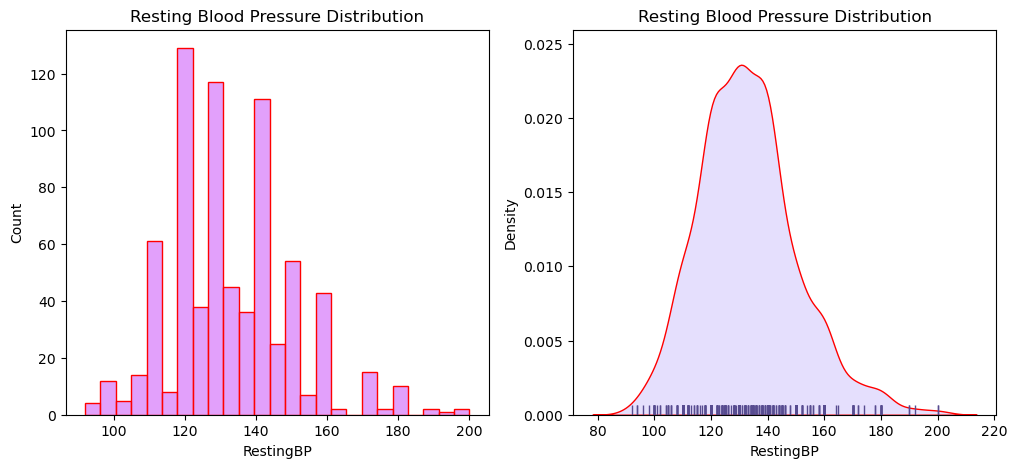

In [39]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0] = sns.histplot(data=df, x='RestingBP', linewidth=1, edgecolor='red', ax=ax[0], color='#D980FA')
ax[0].set(title='Resting Blood Pressure Distribution')

ax[1] = sns.kdeplot(data=df, x='RestingBP', fill=True, edgecolor='red', ax=ax[1], color='#9980FA')
ax[1] = sns.rugplot(data=df, x='RestingBP', ax=ax[1], color='#574b90')
ax[1].set(title='Resting Blood Pressure Distribution')

plt.show()

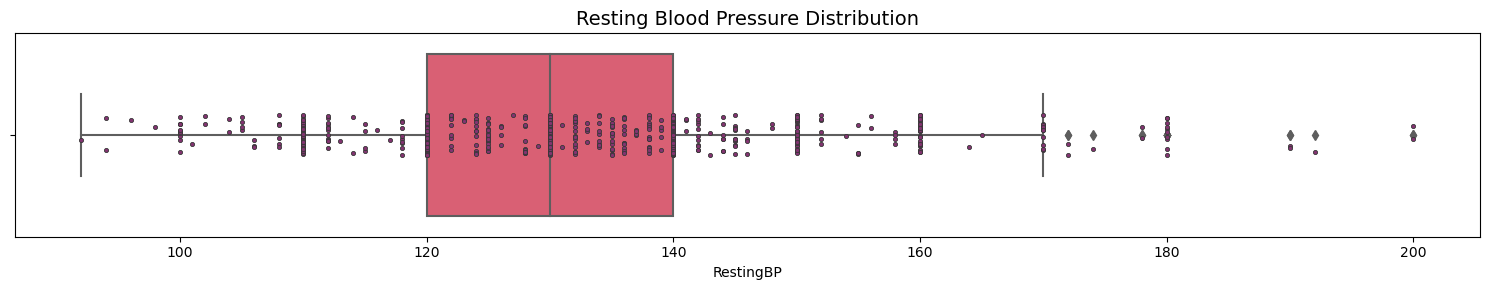

In [40]:
#Checking for outliers in the Rest Blood Pressure Variable
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='RestingBP', color='#ED4C67')
sns.stripplot(data=df, x='RestingBP', linewidth = 0.6, size=3, color='#833471')
plt.title('Resting Blood Pressure Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

In [41]:
#Removeing Outliers using Z-SCORE
mean = np.mean(df['RestingBP'])
std = np.std(df['RestingBP'])
print('mean of the dataset is', mean)
print('std. deviation is', std)
print("Minimum value of Cholesterol",df['RestingBP'].min())
print("Maximum value of Cholesterol",df['RestingBP'].max())

mean of the dataset is 133.07133243606998
std. deviation is 17.28415122069259
Minimum value of Cholesterol 92
Maximum value of Cholesterol 200


In [42]:
print("Upper limit",df['RestingBP'].mean() + 3*df['RestingBP'].std())
print("Lower limit",df['RestingBP'].mean() - 3*df['RestingBP'].std())

Upper limit 184.95871534000858
Lower limit 81.18394953213138


In [43]:
df[(df['Cholesterol'] > 184.95871534000858) | (df['Cholesterol'] < 81.18394953213138)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


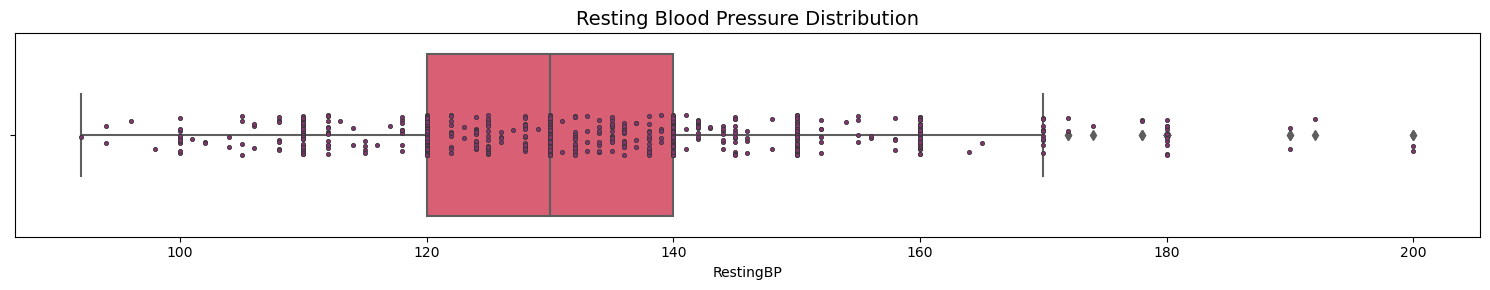

In [45]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='RestingBP', color='#ED4C67')
sns.stripplot(data=df, x='RestingBP', linewidth = 0.6, size=3, color='#833471')
plt.title('Resting Blood Pressure Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

In [46]:
#Tried Trimming onto the data but it was very ineffcient for removing the data so i i am now using Chapping Technique instead to not to loose data and put mean value in place of it

In [48]:
upper_limit = df['RestingBP'].mean() + 3*df['RestingBP'].std()
lower_limit = df['RestingBP'].mean() - 3*df['RestingBP'].std()

df['RestingBP'] = np.where(
    df['RestingBP']>upper_limit,
    upper_limit,
    np.where(
        df['RestingBP']<lower_limit,
        lower_limit,
        df['RestingBP']
    )
)

In [51]:
df.shape

(743, 12)

In [52]:
##Analysis on Max Heart Rate
df['MaxHR'].describe()

count    743.000000
mean     140.234186
std       24.553678
min       69.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64

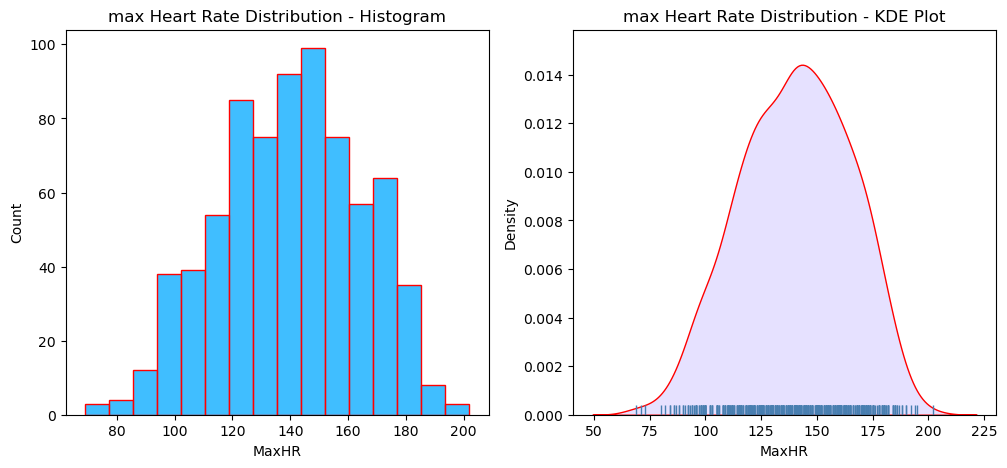

In [53]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0] = sns.histplot(data=df, x='MaxHR', linewidth=1, edgecolor='red', ax=ax[0], color='#00a8ff')
ax[0].set(title='max Heart Rate Distribution - Histogram')

ax[1] = sns.kdeplot(data=df, x='MaxHR', fill=True, edgecolor='red', ax=ax[1], color='#9c88ff')
ax[1] = sns.rugplot(data=df, x='MaxHR', ax=ax[1], color='#487eb0')
ax[1].set(title='max Heart Rate Distribution - KDE Plot')

plt.show()

In [54]:
df['MaxHR'].skew()

-0.16646011182117312

In [55]:
#Check for outliers

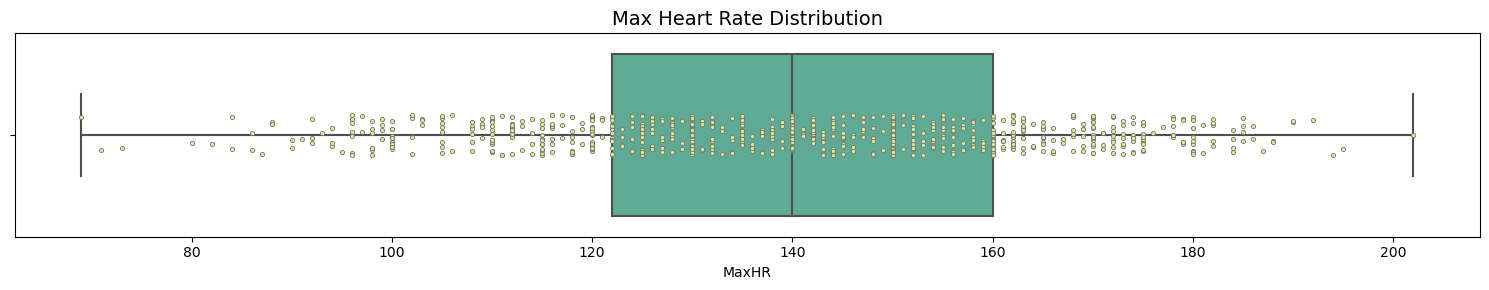

In [56]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='MaxHR', color='#52b69a')
sns.stripplot(data=df, x='MaxHR', linewidth = 0.6, size=3, color='#d9ed92')
plt.title('Max Heart Rate Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

In [57]:
df.query("MaxHR < 70")


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
496,58,M,ASY,132.0,458,1,Normal,69,N,1.0,Down,0


In [58]:
#one outlier was detected but one person is fine wont be removed. i am gonna pass this outlier check!


In [59]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [60]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [63]:
##Label Encoding on all Columns!!
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex']) 
df['ChestPainType']= label_encoder.fit_transform(df['ChestPainType']) 
df['RestingECG']= label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina']= label_encoder.fit_transform(df['ExerciseAngina']) 
df['ST_Slope']= label_encoder.fit_transform(df['ST_Slope']) 
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1      140.0          289          0           1   
1   49    0              2      160.0          180          0           1   
2   37    1              1      130.0          283          0           2   
3   48    0              0      138.0          214          0           1   
4   54    1              2      150.0          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [64]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283,0,2,98,0,0.0,2,0
3,48,0,0,138.0,214,0,1,108,1,1.5,1,1
4,54,1,2,150.0,195,0,1,122,0,0.0,2,0


In [65]:
##Label EnCoding Done!

In [66]:
##Analysis on Heart Disease count

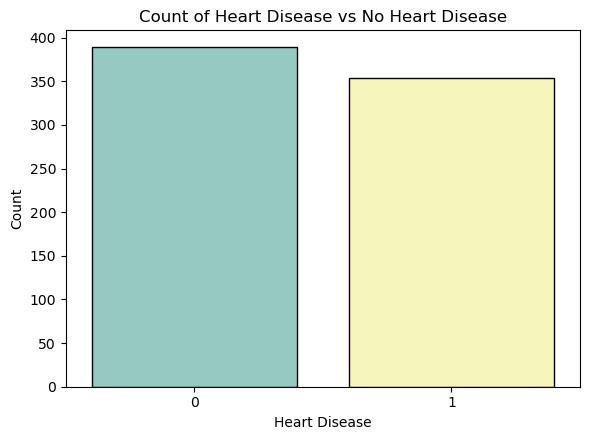

In [72]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax = sns.barplot(data=df['HeartDisease'].value_counts().reset_index(), x='index', y='HeartDisease', 
           linewidth=1, edgecolor='black', palette='Set3', ax=ax)
ax.set(title='Count of Heart Disease vs No Heart Disease', ylabel='Count', xlabel='Heart Disease')
plt.tight_layout()
plt.show()

In [73]:
#Analysis that patients have more heart disease then not heart disease!

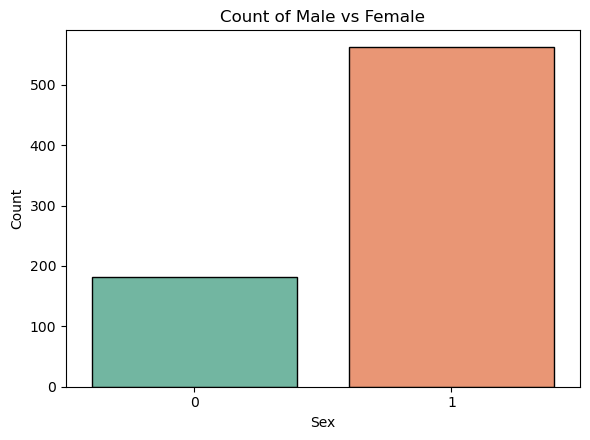

In [74]:
##Analysis on Sex
fig, ax = plt.subplots(figsize=(6, 4.5))
ax = sns.barplot(data=df['Sex'].value_counts().reset_index(), x='index', y='Sex', 
           linewidth=1, edgecolor='black', palette='Set2', ax=ax)
ax.set(title='Count of Male vs Female', ylabel='Count', xlabel='Sex')
plt.tight_layout()
plt.show()

In [75]:
#Females tend to have more heart attacks then male


In [76]:
##Analysis between Heart Disease and Age:
##Which age group is most prone to heart disease?

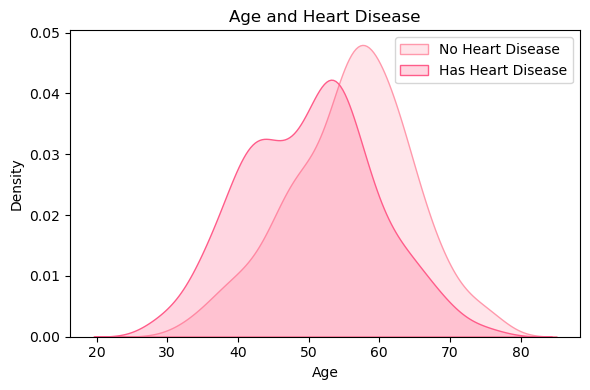

In [77]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data = df[df['HeartDisease'] == 1], x='Age', fill=True,   color='#ff99ac', label='No Heart Disease')
sns.kdeplot(data = df[df['HeartDisease'] == 0], x='Age', fill=True,  color='#ff5c8a', label='Has Heart Disease')
plt.legend()
plt.title('Age and Heart Disease')
plt.tight_layout()
plt.show()

In [78]:
##Analysis done!
#Individuals under the age of 50 have a lower likelihood of experiencing heart disease.
#Once individuals reach the age of 50, the risk of developing heart disease significantly increases.
#The age group between 55 and 60 shows the highest susceptibility to heart disease.
#Individuals above the age of 60 consistently have a higher chance of developing heart disease compared to not having it.

In [79]:
#Analysis between Heart Disease and Gender:
#Which gender is most prone to heart disease?

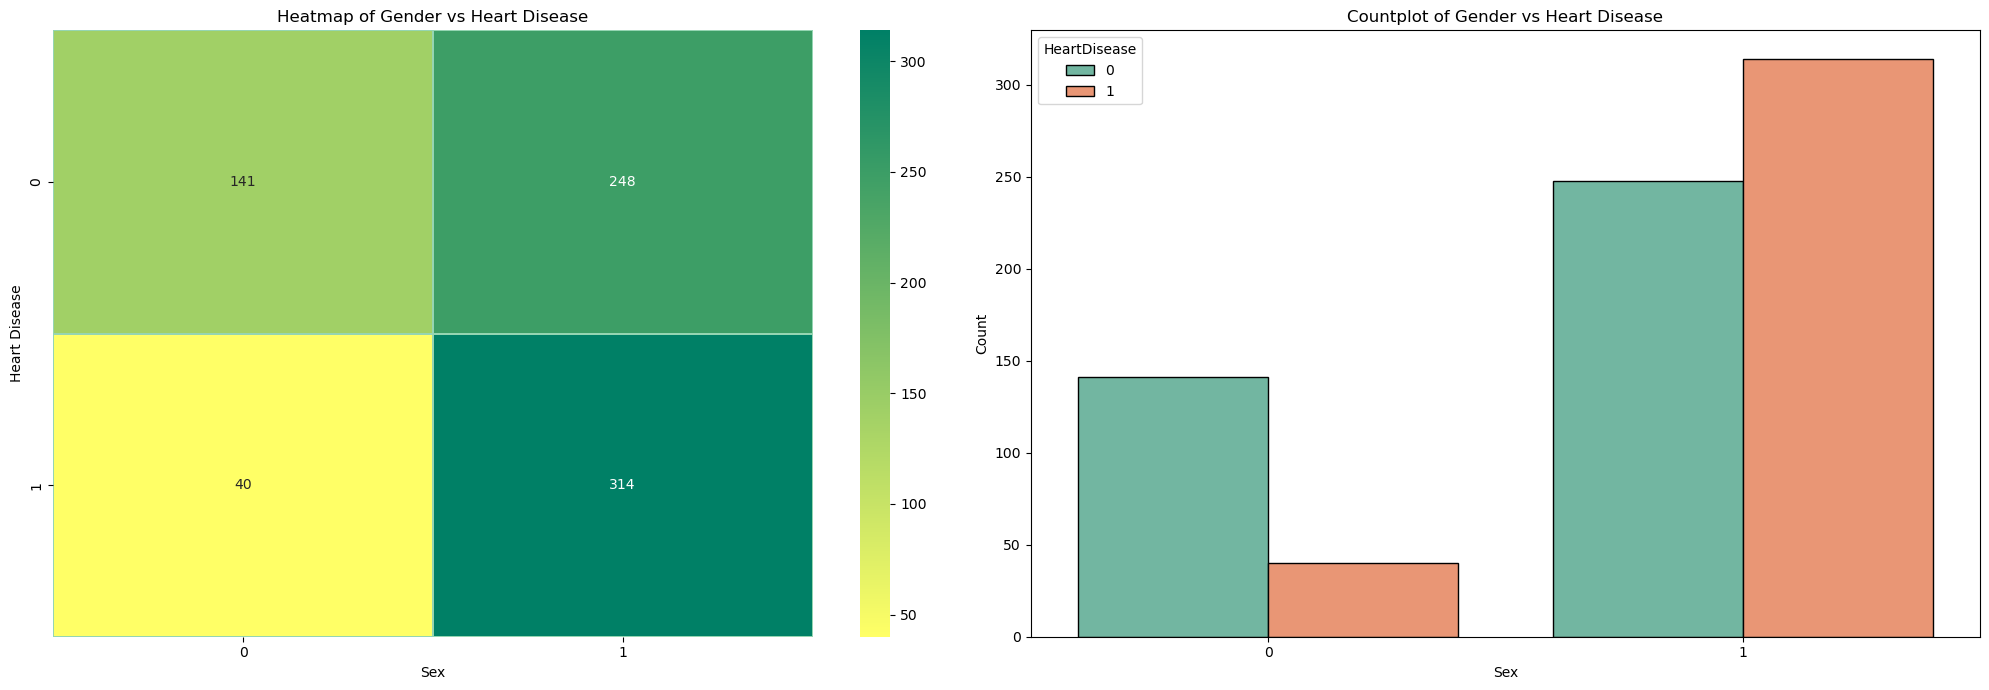

In [80]:
temp_df = pd.crosstab(df['HeartDisease'], df['Sex'])

fig, ax = plt.subplots(1,2, figsize=(20,7))

ax[0] = sns.heatmap(data=temp_df, annot=True, ax=ax[0],fmt='0g', linewidths=0.01, cmap='summer_r', linecolor='#95d5b2')
ax[0].set(title='Heatmap of Gender vs Heart Disease', ylabel='Heart Disease')

ax[1] = sns.countplot(data=df, x="Sex", hue="HeartDisease", palette = 'Set2', ax=ax[1], edgecolor='black')
ax[1].set(title='Countplot of Gender vs Heart Disease', ylabel='Count')

plt.tight_layout()
plt.show()

In [81]:
#The occurrence of heart disease is more prevalent among males compared to females.
#It's important to note that our dataset contains significantly more data for males than females, almost three times as much.
#However, when considering the percentages, approximately 25% of females in the dataset have heart disease, while a higher percentage of around 63% of males have heart disease.
#These observations highlight the gender disparity in the prevalence of heart disease, with a higher proportion of males being affected.

In [82]:
#Feature Engineering Commencess from here

In [83]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.360591,1,1,0.409608,0.821670,0,1,1.294601,0,0.015873,2,0
1,-0.410578,0,2,1.581223,-1.139851,0,1,0.642528,0,0.174603,1,1
2,-1.677262,1,1,-0.176199,0.713696,0,2,-1.721234,0,0.015873,2,0
3,-0.516135,0,0,0.292447,-0.528000,0,1,-1.313689,1,0.253968,1,1
4,0.117207,1,2,0.995416,-0.869917,0,1,-0.743126,0,0.015873,2,0


In [84]:
#i did the following because
#Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.
#Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.


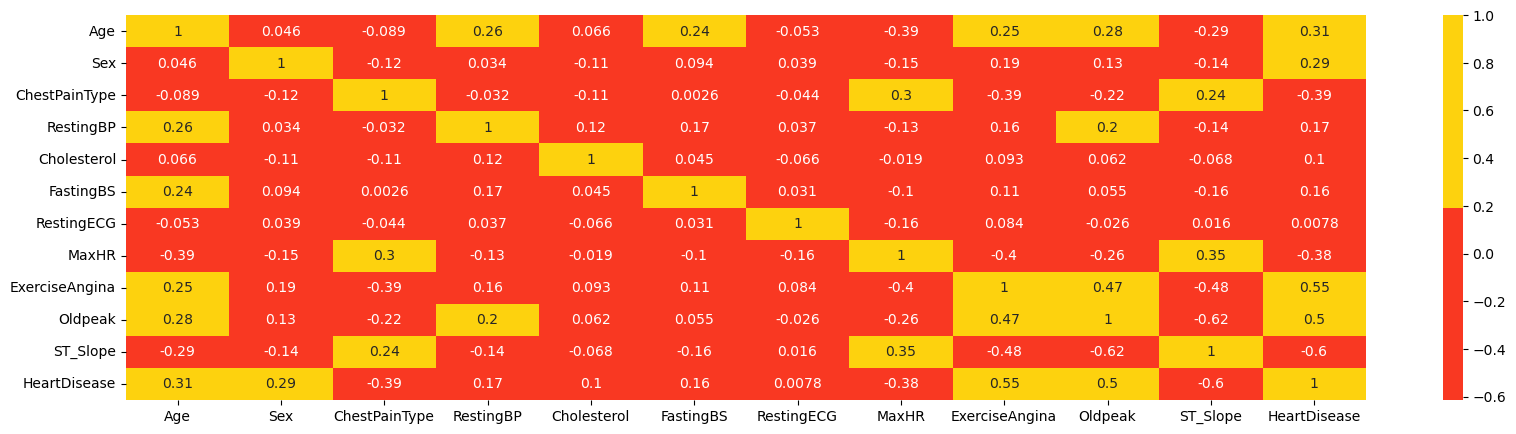

In [86]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),cmap = colors,annot = True);

In [87]:
#to many corelations found i will only work on corelations with heart disease because that is my only task :)

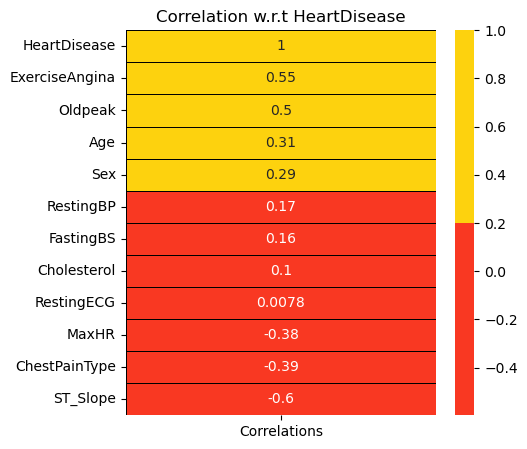

In [88]:
corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

In [95]:
features = df[df.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [96]:
x_train.shape

(594, 9)

In [97]:
lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
lr.fit(x_train,y_train)

LogisticRegression(C=10, random_state=0)

In [98]:
y_pred = lr.predict(x_test)

In [100]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix is: \n{cm}')

Confusion Matrix is: 
[[70 13]
 [14 52]]


In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        83
           1       0.80      0.79      0.79        66

    accuracy                           0.82       149
   macro avg       0.82      0.82      0.82       149
weighted avg       0.82      0.82      0.82       149



In [102]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns =['Predicted No' , 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,70,13
Actual Yes,14,52


In [103]:
##Applying Second Model


In [117]:
decision_tree = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1000)

In [118]:
y_pred = decision_tree.predict(x_test)

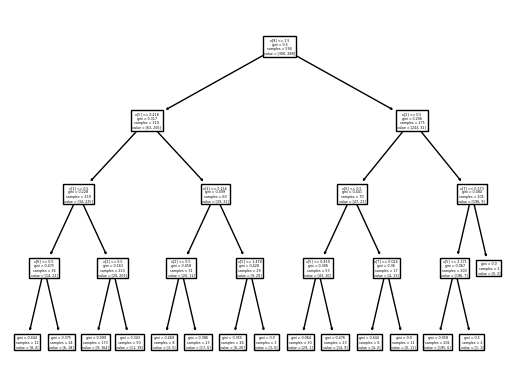

In [120]:
from sklearn import tree
tree.plot_tree(decision_tree)
plt.show()

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        83
           1       0.86      0.77      0.82        66

    accuracy                           0.85       149
   macro avg       0.85      0.84      0.84       149
weighted avg       0.85      0.85      0.84       149



In [107]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns =['Predicted No' , 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,75,8
Actual Yes,15,51


In [108]:
##Applying third model

In [109]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

In [110]:
y_pred = classifier_knn.predict(x_test)

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        83
           1       0.72      0.71      0.72        66

    accuracy                           0.75       149
   macro avg       0.75      0.75      0.75       149
weighted avg       0.75      0.75      0.75       149



In [112]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns =['Predicted No' , 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,65,18
Actual Yes,19,47


In [114]:
#To reduce dimensions i am going to use PCA technique in my CCP.
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)


# Train a model on the PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test set
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_original = accuracy_score(y_test,y_pred)
# Compare the accuracies
print("Accuracy (Original):", accuracy_original)
print("Accuracy (PCA):", accuracy_pca)

Accuracy (Original): 0.7516778523489933
Accuracy (PCA): 0.8053691275167785


In [121]:
##CCP COMPLETED! Analysis Given on word File!